Import

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import calibration_curve, CalibrationDisplay


Load Dataset

In [2]:
df = pd.read_csv('../ift6758/data/extracted/shot_goal_20151007_20210707.csv')

df_dropped = df[df['season']!=20192020]

Preview the data

In [7]:
df_dropped.head(2)

,gameId,season,gameType,dateTime,team,eventIdx,event,isGoal,shotType,description,...,prevEvent,prevX,prevY,prevAngleWithGoal,secondsSincePrev,distanceFromPrev,rebound,changeOfAngleFromPrev,speed,speedOfChangeOfAngle
0,2015020001,20152016,R,2015-10-07T23:24:23Z,Toronto Maple Leafs,7,Shot,0.0,Wrist Shot,Brad Boyes Wrist Shot saved by Carey Price,...,Hit,94.0,-34.0,81.634114,11.0,154.275727,False,0.0,14.025066,0.0
1,2015020001,20152016,R,2015-10-07T23:24:38Z,Toronto Maple Leafs,9,Shot,0.0,Snap Shot,Nazem Kadri Snap Shot saved by Carey Price,...,Giveaway,-37.0,-28.0,12.528808,7.0,50.477718,False,0.0,7.211103,0.0


In [8]:
df_dropped.columns

Index(['gameId', 'season', 'gameType', 'dateTime', 'team', 'eventIdx', 'event',
       'isGoal', 'shotType', 'description', 'period', 'periodType',
       'periodTime', 'secondsSinceStart', 'strength', 'emptyNet', 'x', 'y',
       'rinkSide', 'distanceToGoal', 'angleWithGoal', 'scorer', 'assist',
       'goalie', 'shooter', 'prevSecondsSinceStart', 'prevEvent', 'prevX',
       'prevY', 'prevAngleWithGoal', 'secondsSincePrev', 'distanceFromPrev',
       'rebound', 'changeOfAngleFromPrev', 'speed', 'speedOfChangeOfAngle'],
      dtype='object')

In [10]:
df_filtered = df_dropped[['isGoal', 'distanceToGoal']]
df_filtered.head(1)

,isGoal,distanceToGoal
0,0.0,34.525353


Split Train & Validation Dataset

In [15]:
train, test = train_test_split(df_filtered, test_size=0.33, random_state=42)
print(train.shape)
print(test.shape)

(256019, 2)
(126100, 2)


In [25]:
x = train['distanceToGoal'].to_numpy().reshape(-1, 1)

y = train['isGoal'].to_numpy()

x_test = test['distanceToGoal'].to_numpy().reshape(-1, 1)

y_test = test['isGoal'].to_numpy()

3.1 Create Logistic Regression Model

In [26]:
# instanciate a logistic regression model
clf = LogisticRegression()

# train model
clf.fit(x, y)

# score model
clf.score(x_test, y_test)

0.9061934972244251

3.2

Compute ROC and AUC

In [43]:
y_score = clf.predict_proba(x_test)
preds = y_score[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

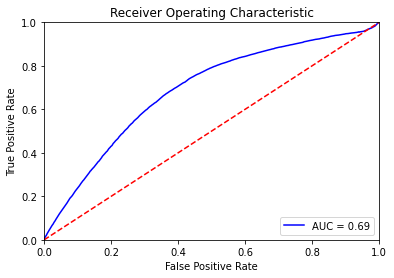

In [44]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Calibration

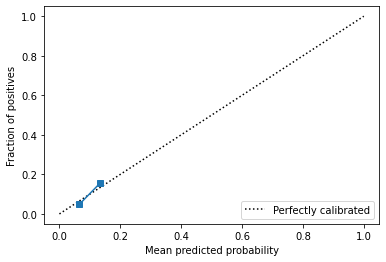

In [47]:
prob_true, prob_pred = calibration_curve(y_test, preds, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, preds)
disp.plot()

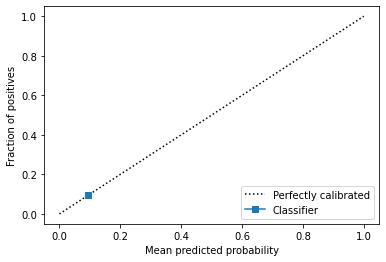

In [48]:
disp = CalibrationDisplay.from_predictions(y_test, preds)
plt.show()

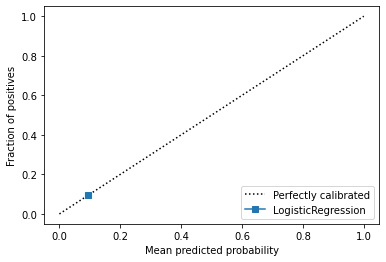

In [49]:
disp = CalibrationDisplay.from_estimator(clf, x_test, y_test)
plt.show()